In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #warnings module : to handle warnings raised during code execution.

In [ ]:
df = pd.read_csv('/content/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

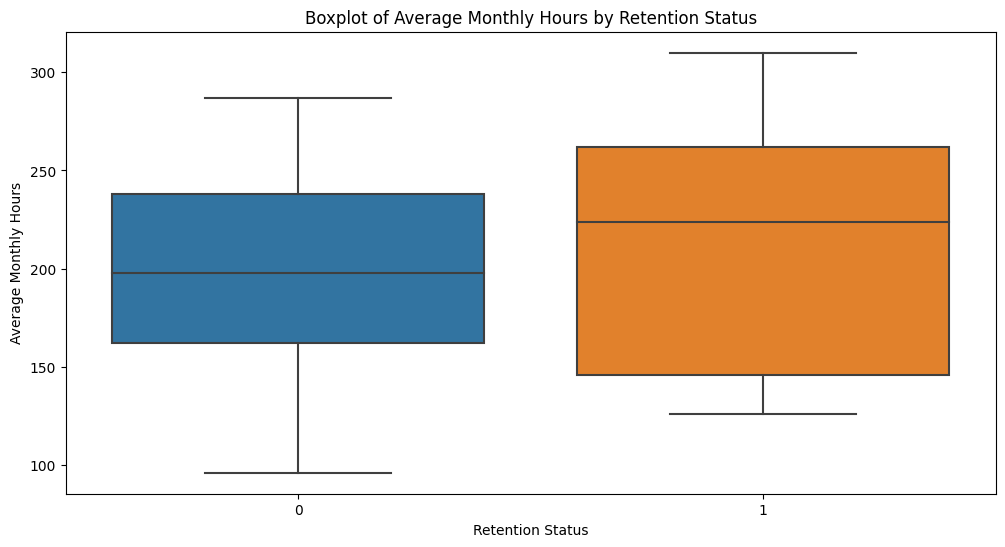

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='left',y='average_montly_hours',data=df)
plt.title('Boxplot of Average Monthly Hours by Retention Status')
plt.xlabel('Retention Status')
plt.ylabel('Average Monthly Hours')
plt.show()

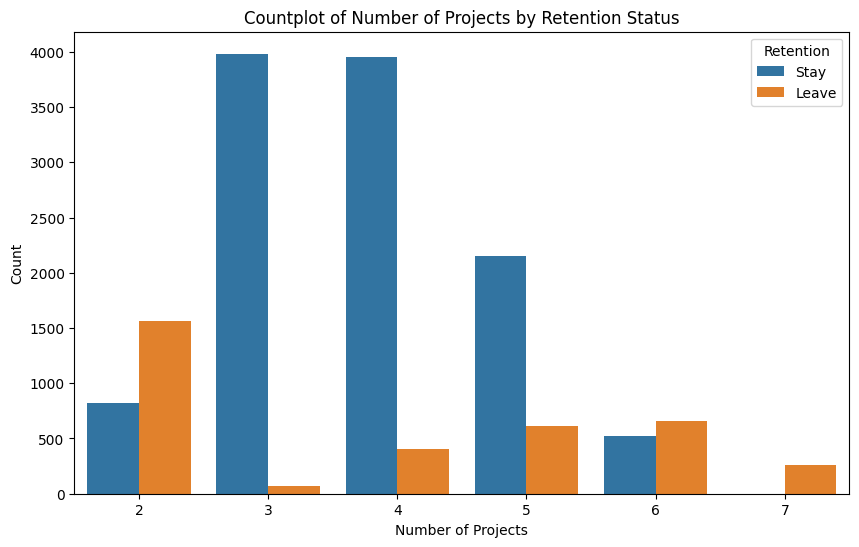

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='number_project',hue='left',data=df)
plt.title('Countplot of Number of Projects by Retention Status')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Retention',labels=['Stay','Leave'])
plt.show()






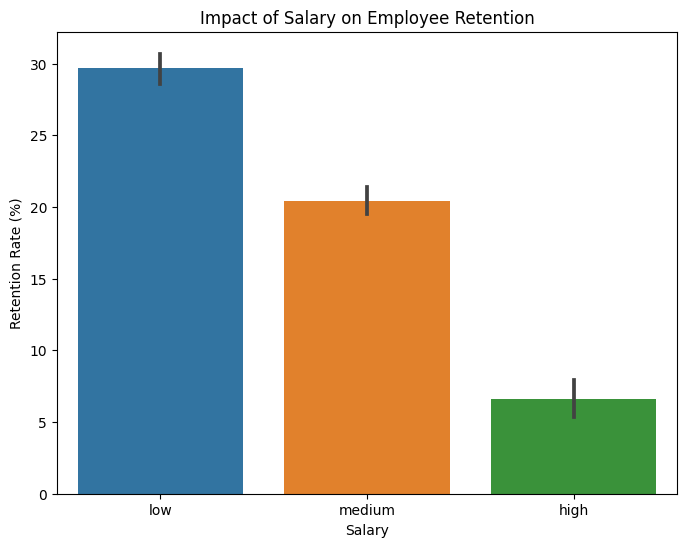

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='salary',y='left',data=df,estimator=lambda x:sum(x)/len(x)*100)
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary')
plt.ylabel('Retention Rate (%)')
plt.show()

(8.5, -0.5)

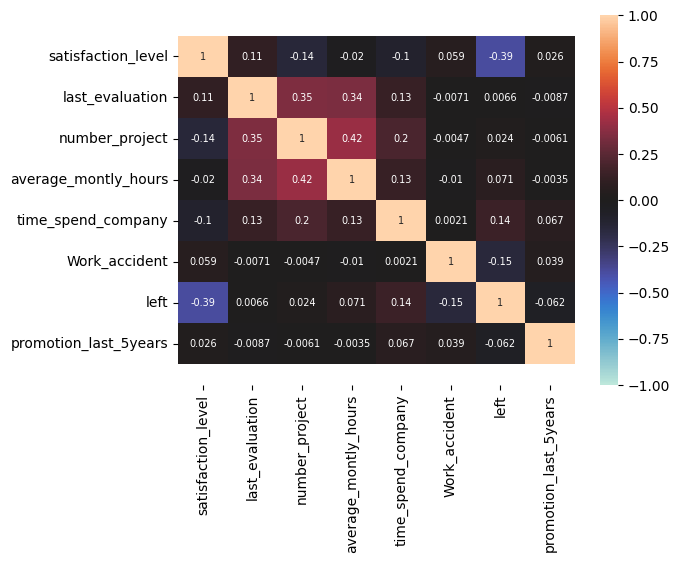

In [ ]:
corr_matrix = df.corr()
ax = sns.heatmap ( data = corr_matrix , annot = True , annot_kws = { "size" : 7 }, vmax= 1 , vmin= -1 , center = 0 )
bottom , top = ax.get_ylim ()
ax.set_ylim ( bottom + 0.5 , top = -0.5 )

In [ ]:
df = pd.get_dummies( df , columns= [ 'Department' , 'salary' ], drop_first= True )
df.head ()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, precision_score, recall_score

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
X = df.drop('left', axis=1)

In [ ]:
y = df['left']

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (14999, 18)
y shape: (14999,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
model = LogisticRegression(max_iter=1000,random_state=20)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=20)

In [ ]:
lr_prediction = model.predict(X_test)

In [ ]:
print("y_predicted",lr_prediction)

y_predicted [0 0 1 ... 0 1 0]


In [ ]:
print("y_test",y_test)

y_test 6493     0
3568     0
972      1
3260     0
671      1
        ..
13542    0
11146    0
3256     0
14443    1
4566     0
Name: left, Length: 3000, dtype: int64


In [ ]:
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7973333333333333


In [ ]:
accuracy = accuracy_score( y_test ,lr_prediction )
precision = precision_score( y_test , lr_prediction )
recall = recall_score( y_test , lr_prediction )
confusion = confusion_matrix( y_test , lr_prediction )
sensitivity = confusion [ 1 , 1 ] / ( confusion [ 1 , 0 ] + confusion [ 1 , 1 ])
specificity = confusion [ 0 , 0 ] / ( confusion [ 0 , 0 ] + confusion [ 0 , 1 ])

print( f"Accuracy: { accuracy :.2f} " )
print( f"Precision: { precision :.2f} " )
print( f"Recall: { recall :.2f} " )
print( f"Sensitivity: { sensitivity :.2f} " )
print( f"Specificity: { specificity :.2f} " )

Accuracy: 0.80 
Precision: 0.61 
Recall: 0.37 
Sensitivity: 0.37 
Specificity: 0.93 


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix ( y_test , lr_prediction )
print ( conf_matrix )

[[2132  165]
 [ 443  260]]


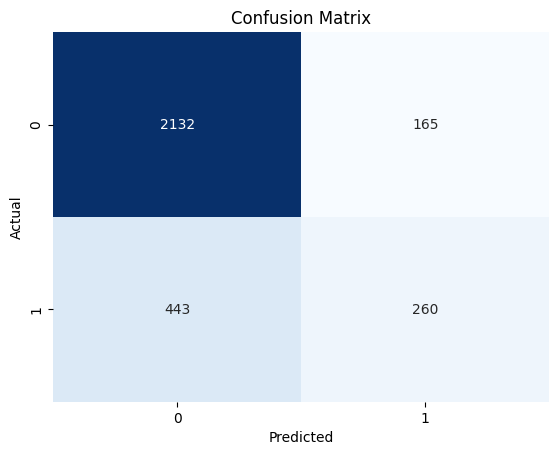

In [ ]:
sns.heatmap ( confusion , annot= True , fmt= 'd' , cmap= 'Blues' , cbar= False )
plt.xlabel ( 'Predicted' )
plt.ylabel ( 'Actual' )
plt.title ( 'Confusion Matrix' )
plt.show ()

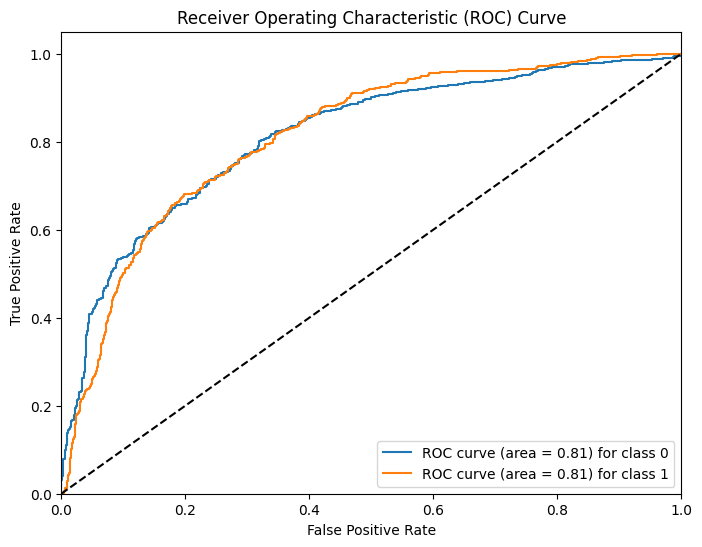

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for each class (assuming you have fitted a multiclass model)
y_prob = model.predict_proba(X_test)

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming you have three classes: 'low', 'medium', 'high'
n_classes = len(model.classes_)
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test == model.classes_[i], y_prob[:, i])
  roc_auc[i] = roc_auc_score(y_test == model.classes_[i], y_prob[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {model.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()